In [1]:
using DataFrames,PythonPlot,StatsBase,Random,Distributions,CSV
PythonPlot.svg(true)
include("model.jl")
include("formulas.jl")

FIG_PATH = "/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

"/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

In [ ]:

ω0range_ = collect(0.02:0.05:10.)
ηrange_ = collect(0.02:0.05:4)
l =20
C = zeros(length(ω0range_), length(ηrange_))
Ws = zeros(length(ω0range_), length(ηrange_),l)
Ss = zeros(length(ω0range_), length(ηrange_))
Ks = zeros(length(ω0range_), length(ηrange_), l, l)

for i in 1:length(ω0range_)
    for j in 1:length(ηrange_)
        ω0 = ω0range_[i]
        η = ηrange_[j]
        K = [ksho(abs(i-j)*log(2), η, ω0) for i in 1:l, j in 1:l]
        # condition number
        C[i,j] = cond(K)

        k_l = [ksho(abs(j)*log(2), η, ω0) for j in 1:l]
        ch = cholesky(Symmetric(K); check=false)  # robust if κ is only semidefinite
        wl = ch \ k_l
        σ2 = ksho(0.0, η, ω0) - dot(k_l, wl)
        Ws[i,j,:] = wl
        Ss[i,j] = σ2
        Ks[i,j,:,:] = K

    end
end


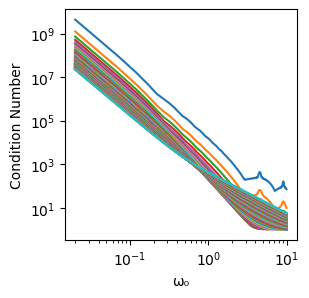

In [57]:
fig,ax = subplots(figsize=(3,3))
for i in 1:length(ηrange_)
    ax.loglog(ω0range_, C[:,i])
end
ax.set_xlabel("ω₀")
ax.set_ylabel("Condition Number") 
fig

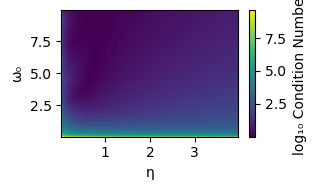

In [58]:
fig,ax = subplots(figsize=(3,2))
c = ax.imshow(log10.(C),  extent=(minimum(ηrange_), maximum(ηrange_),minimum(ω0range_), maximum(ω0range_)), origin="lower", aspect="auto")
ax.set_ylabel("ω₀")
ax.set_xlabel("η")
fig.colorbar(c, ax=ax, label="log₁₀ Condition Number")
tight_layout()
fig

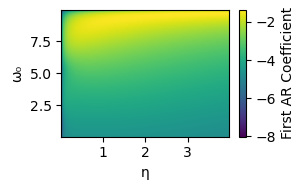

In [59]:
Ws[:,:,1]

# make contour plot of first AR coefficient
fig,ax = subplots(figsize=(3,2))
c = ax.imshow(log.(abs.(Ss[:,:,1])),  extent=(minimum(ηrange_), maximum(ηrange_),minimum(ω0range_), maximum(ω0range_)), aspect="auto")  
ax.set_ylabel("ω₀")
ax.set_xlabel("η")
fig.colorbar(c, ax=ax, label="First AR Coefficient")
tight_layout()
fig

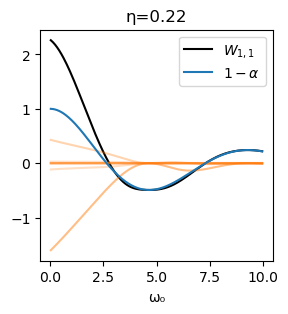

In [69]:
fig, ax = subplots(figsize=(3,3))
j = 5 # index for η
ax.plot(ω0range_,Ws[:,j,1], "k-",label= L"$W_{1,1}$")
for k in 2:l
    ω0 = ω0range_[k]
    η = ηrange_[j]
    ax.plot(ω0range_, Ws[:,j,k], "C1-",alpha=1/k)
end
ax.plot(ω0range_, [ksho(log(2), ηrange_[j], ω0range_[i])/ksho(0.0, ηrange_[j], ω0range_[i]) for i in 1:length(ω0range_)], "C0-",label=L"$1-\alpha$")
#ax.set_ylim([-10,10])
ax.set_xlabel("ω₀")
ax.set_title("η=$(ηrange_[j])")
ax.legend()
fig

In [349]:

η =3.3
ω0range_ = collect(0.1:0.1:6.)

# Preallocate
l = 5
ws = zeros(length(ω0range_),l)
c = zeros(length(ω0range_),l)
Ks = []
# Populate the matrix
for (i, ω0) in enumerate(ω0range_)
    K   = [ksho(abs(i-j)*log(2), η,ω0) for i in 1:l, j in 1:l]
    push!(Ks, K)
    c[i,:] = eigen(K).values

    w,s  = ar_coeffs_from_cov(κz, 1/log(2), l)
    ws[i, :] = w
end


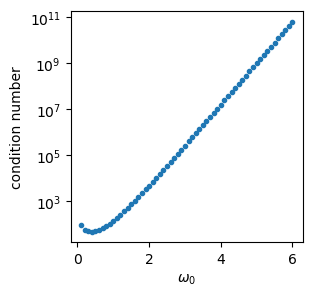

In [101]:
conds = [cond(Ks[i]) for  i in 1:length(ω0range_)]
fig,ax = subplots(figsize=(3,3))
ax.semilogy(ω0range_, conds, ".")
#ax.vlines(1/log(2)/η, ymin=minimum(conds), ymax=maximum(conds), colors="k", linestyles="--")
ax.set_xlabel(L"\omega_0")
ax.set_ylabel("condition number")
fig

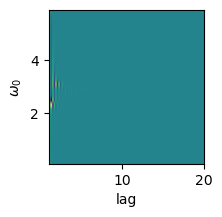

In [303]:
fig,ax = subplots(figsize=(2,2))
ax.imshow(ws[:,:] ./ ws[:,1],aspect="auto"
,extent=(1,20,ω0range_[1], ω0range_[end]), cmap="viridis")
ax.set_ylabel(L"\omega_0")
ax.set_xlabel("lag")
fig

In [168]:
sqrt(1-η^2)*2.8*log(2)

1.680792587394121

In [166]:
π/2

1.5707963267948966

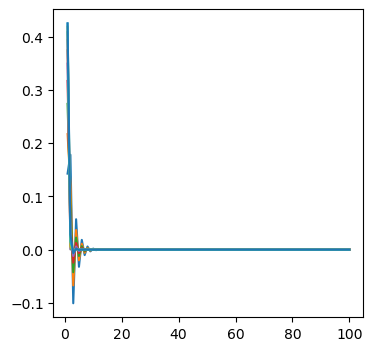

In [ ]:
fig,ax = subplots(figsize=(4,4))
for i in 20:1:length(ω0range_)
    ax.plot(collect(1:l),- ws[i,:], "-")
end
ax.plot(collect(1:l),alpha_SHO(), "k-", linewidth=2)
fig

In [ ]:
ksho(0.0, η2)

0.25

In [25]:
1/log(2)

1.4426950408889634